In [ ]:

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
#now copy api command
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.06G/1.06G [00:09<00:00, 138MB/s]
100% 1.06G/1.06G [00:09<00:00, 116MB/s]


###our dataset is in .zip format ..now we will unzip it

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("/content/dogs-vs-cats.zip")
zip_ref.extractall("/content")
zip_ref.close()

#now we will load libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D, MaxPooling2D, Flatten

##now we will use the concept of generators to load data in batches and at the same time customize it as well

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',   # cat = 0, dog = 1
    batch_size = 32,
    image_size = (256,256)

)

validation_ds = keras.utils.image_dataset_from_directory(
      directory = '/content/test',
      labels = 'inferred',
      label_mode = 'int',   # cat = 0, dog = 1
      batch_size = 32,
      image_size = (256,256)

)



Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#normalizing our data

def process(image, label):
  image = tf.cast(image/255, tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

#building cnn model

###padding is used to control the spatial dimensions of the output feature map. If padding is applied, the network adds extra pixels around the borders of the input image, typically filling these added pixels with zeros.

In [ ]:
model1 = Sequential()

model1.add(Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu', input_shape = (256,256,3)))
model1.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model1.add(Conv2D(64, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model1.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model1.add(Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model1.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model1.add(Flatten())

model1.add(Dense(128, activation  = 'relu'))
model1.add(Dense(64, activation = 'relu'))
model1.add(Dense(1, activation = 'sigmoid'))




/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,686,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,732,705 (14.24 MB)

 Trainable params: 3,732,705 (14.24 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'] )

In [ ]:
history = model1.fit(train_ds, epochs = 10, validation_data = validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 76ms/step - accuracy: 0.5124 - loss: 0.7068 - val_accuracy: 0.6208 - val_loss: 0.6398
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 70s 68ms/step - accuracy: 0.6833 - loss: 0.5965 - val_accuracy: 0.7806 - val_loss: 0.4766
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 87s 75ms/step - accuracy: 0.7984 - loss: 0.4294 - val_accuracy: 0.7696 - val_loss: 0.5227
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 69ms/step - accuracy: 0.8841 - loss: 0.2678 - val_accuracy: 0.7762 - val_loss: 0.6925
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 95ms/step - accuracy: 0.9580 - loss: 0.1149 - val_accuracy: 0.7698 - val_loss: 1.0527
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 72s 78ms/step - accuracy: 0.9749 - loss: 0.0719 - val_accuracy: 0.7626 - val_loss: 1.1339
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 85ms/step - accuracy: 0.9858 - loss: 0.0432 - val_accuracy: 0.7600 - val_loss: 1.2102
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 73s 72ms/step - accuracy: 0.9874 - loss: 0.0387 - 

##if you have higher accuracy in training data it is the case of overfitting

In [ ]:
import matplotlib.pyplot as plt


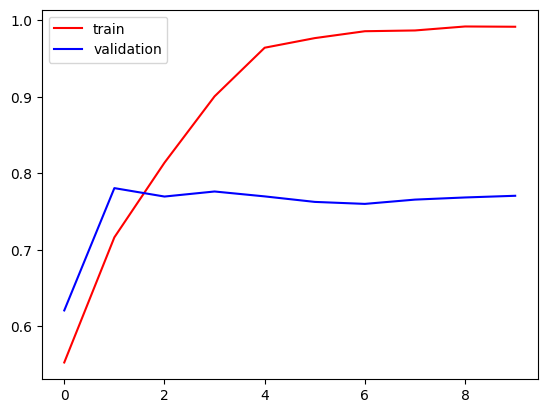

In [ ]:
plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

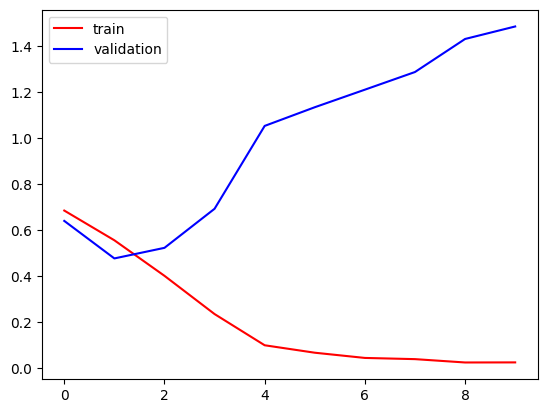

In [ ]:
plt.plot(history.history['loss'], color = 'red', label = 'train')
plt.plot(history.history['val_loss'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

# Now we will regularize our model

###Dropout regularization is a technique used in neural networks to prevent overfitting, which occurs when a model learns the training data too well, including the noise and outliers, and therefore performs poorly on new, unseen data. Dropout helps to make the model more generalizable and robust by randomly "dropping out" (i.e., setting to zero) a fraction of the neurons during each training iteration.

In [ ]:
from keras.layers import BatchNormalization, Dropout

In [ ]:
model1 = Sequential()

model1.add(Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu', input_shape = (256,256,3)))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))



model1.add(Conv2D(64, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model1.add(BatchNormalization())

model1.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model1.add(Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model1.add(BatchNormalization())

model1.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model1.add(Flatten())

model1.add(Dense(128, activation  = 'relu'))
model1.add(Dropout(0.1))
model1.add(Dense(64, activation = 'relu'))
model1.add(Dropout(0.1))
model1.add(Dense(1, activation = 'sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


##Batch Normalization is a technique used in training neural network to make them faster and more stable. It actually make the training data mean as 0 and standard dev as 1.

In [ ]:
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 28800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │       3,686,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,733,217 (14.24 MB)

 Trainable params: 3,732,961 (14.24 MB)

 Non-trainable params: 256 (1.00 KB)

In [ ]:
model1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'] )

In [ ]:
history = model1.fit(train_ds, epochs = 10, validation_data = validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 73ms/step - accuracy: 0.5585 - loss: 1.2855 - val_accuracy: 0.6290 - val_loss: 0.6434
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 84ms/step - accuracy: 0.7072 - loss: 0.5693 - val_accuracy: 0.7342 - val_loss: 0.5321
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 71ms/step - accuracy: 0.7778 - loss: 0.4700 - val_accuracy: 0.7666 - val_loss: 0.5120
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.8268 - loss: 0.3912 - val_accuracy: 0.7670 - val_loss: 0.5253
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 79ms/step - accuracy: 0.8587 - loss: 0.3241 - val_accuracy: 0.7836 - val_loss: 0.5526
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 73ms/step - accuracy: 0.9064 - loss: 0.2336 - val_accuracy: 0.7188 - val_loss: 0.7934
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 73ms/step - accuracy: 0.9378 - loss: 0.1579 - val_accuracy: 0.7990 - val_loss: 0.7308
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.9600 - loss: 0.1054 - 

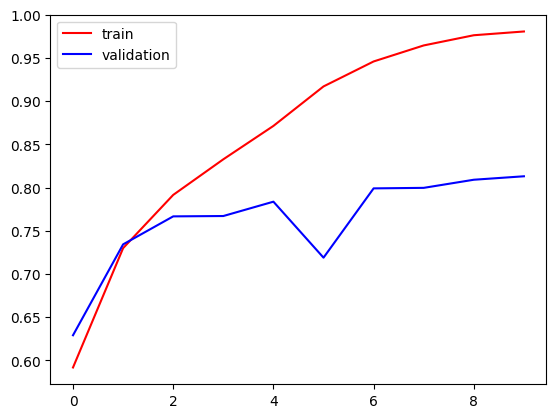

In [ ]:
plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

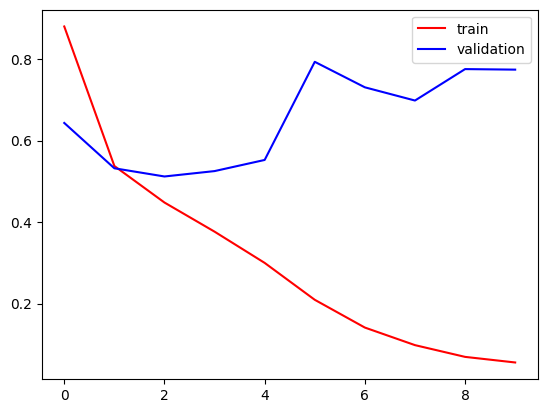

In [ ]:
plt.plot(history.history['loss'], color = 'red', label = 'train')
plt.plot(history.history['val_loss'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

##Conclusion -- after normalization, somehow the model is not very much overfitted

#Object Detection

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/dog.jpeg')

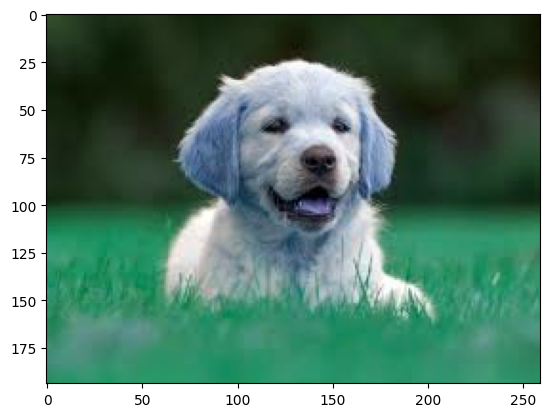

In [ ]:
plt.imshow(test_img)
plt.show()

In [ ]:
# shape
test_img.shape

(194, 259, 3)

In [ ]:
#we will reshape our test image

test_img = cv2.resize(test_img, (256,256))

In [ ]:
test_img.shape

(256, 256, 3)

In [ ]:
#now i will change the dimension using - reshape function

test_img = test_img.reshape(1, 256, 256, 3)

In [ ]:
test_img.shape

(1, 256, 256, 3)

In [ ]:
#making prediction

res = model1.predict(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [ ]:
int(res)

<ipython-input-73-503c48e45fc9>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  int(res)


1